In [21]:
import numpy as np
from matplotlib.path import Path
from matplotlib import pyplot as plt
import pickle

import sys
sys.path.insert(0,'./src/')

from utils import *
from pipe_system import PipeSystem
from abstract_pipe import *
from pipe_system.let_index import LetIndex
from multiply_connected_pipe import *
from fmm2dpy import cfmm2d

In [22]:
with open('./exp1/pipes_and_shifts.pickle','rb') as f:
    pipes, shifts = pickle.load(f)

In [23]:
bdr_pipe = BoundaryPipe([BoundaryLet(-5,0,0,1,-1),BoundaryLet(31,0,np.pi,1,1)])
real_pipes = [RealPipe(p,shift_x=shift[0],shift_y=shift[1]) for p,shift in zip(pipes,shifts)]
ps = PipeSystem(real_pipes,bdr_pipe)

In [24]:
xs, ys, u_field, v_field, p_field, o_field = ps.plotting_data()

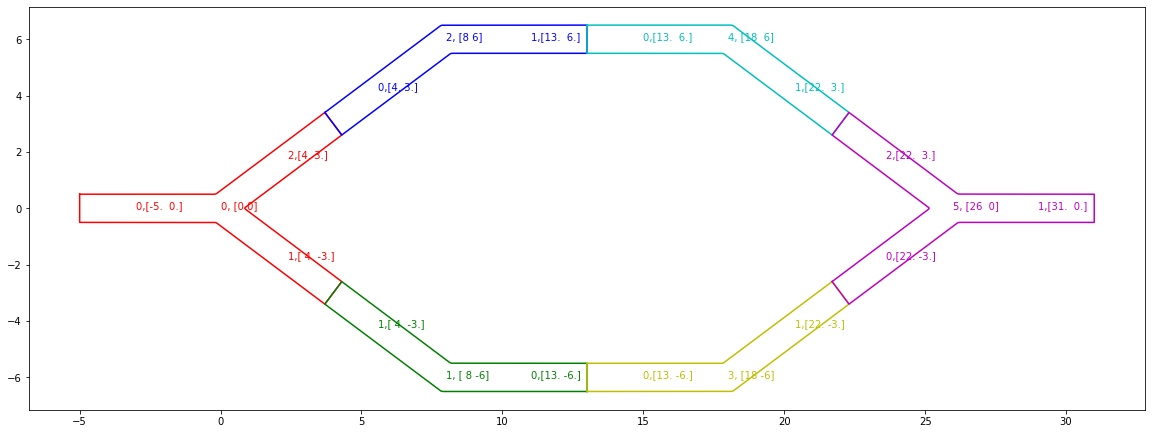

In [25]:
color = ['r','g','b','y','c','m','k']

fig,ax = plt.subplots(figsize=(20,10))
ax.set_aspect('equal')

for a,i,j,c in zip(range(10),pipes,shifts,color):
    ax.plot(*(i.exterior_boundary.plyg_bdr() + j).T,c=c)
    for k,let in enumerate(i.lets):
        ax.text(*(0.6*let.matching_pt + j),f'{k},{let.matching_pt + j}',color=c)
    ax.text(*j,f'{a}, {j}',color=c)

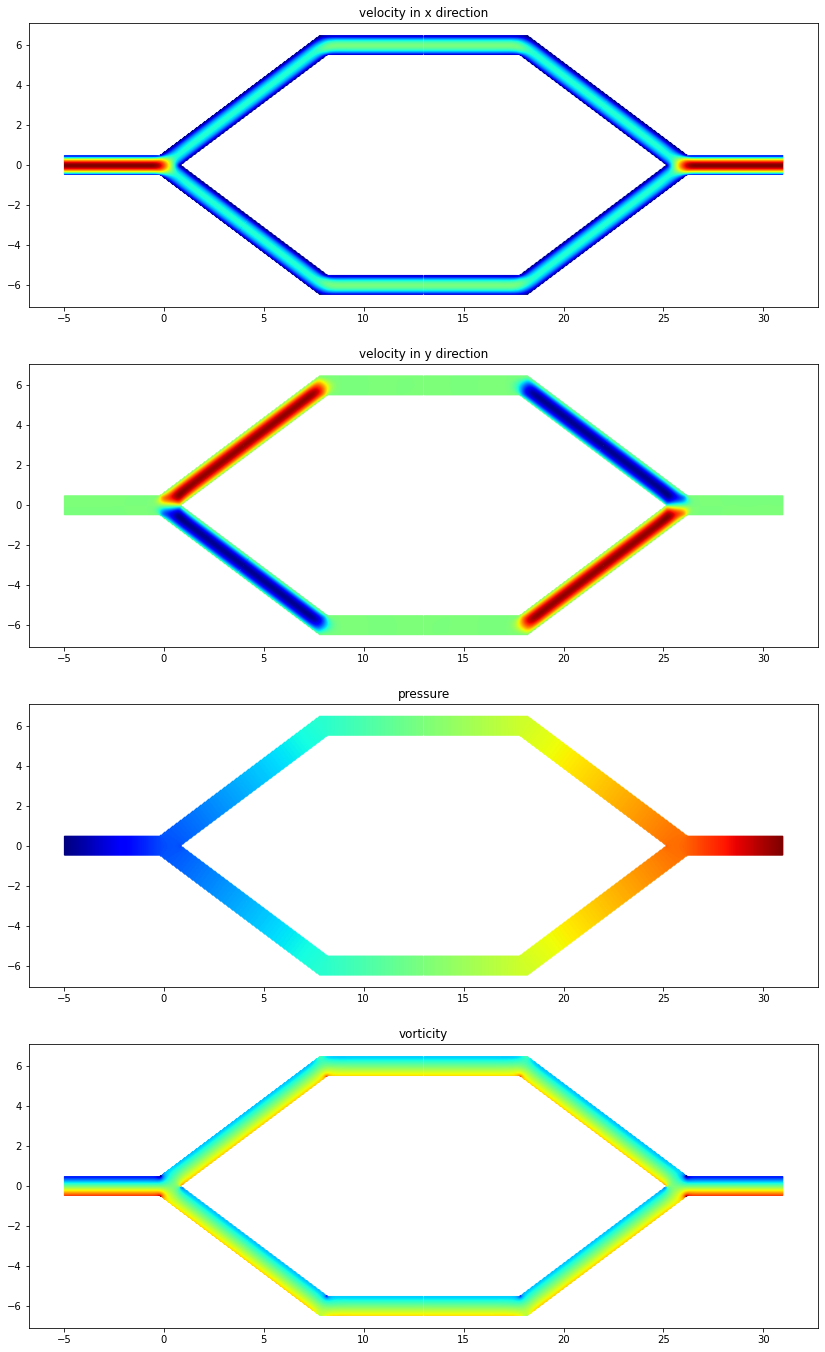

In [26]:
fig,axes = plt.subplots(4,1,figsize=(20,24))

for ax, field, title, in zip(axes, [u_field,v_field,p_field,o_field], ['velocity in x direction','velocity in y direction','pressure','vorticity']):
    ax.set_aspect('equal')
    ax.scatter(xs,ys,c=field,s=1,cmap='jet')
    ax.set_title(title)

In [28]:
with open('./exp2/global_pipe_fmm.pickle','rb') as f:
    pipe = pickle.load(f)
[p._build() for p in pipe.panels]
omega = pipe.omegas[0]
p_global, o_global = pipe.pressure_and_vorticity(xs,ys,omega)

/Users/haiy/pkg/fmm2d/python/fmm2dpy/fmm2d.py:894: ComplexWarning: Casting complex values to real discards the imaginary part
  out.pottarg,out.gradtarg,out.ier = lfmm.cfmm2d_t_d_g(eps,sources,dipstr,targets)


In [34]:
u_global, v_global = (pipe.velocity(xs,ys,omega)).T

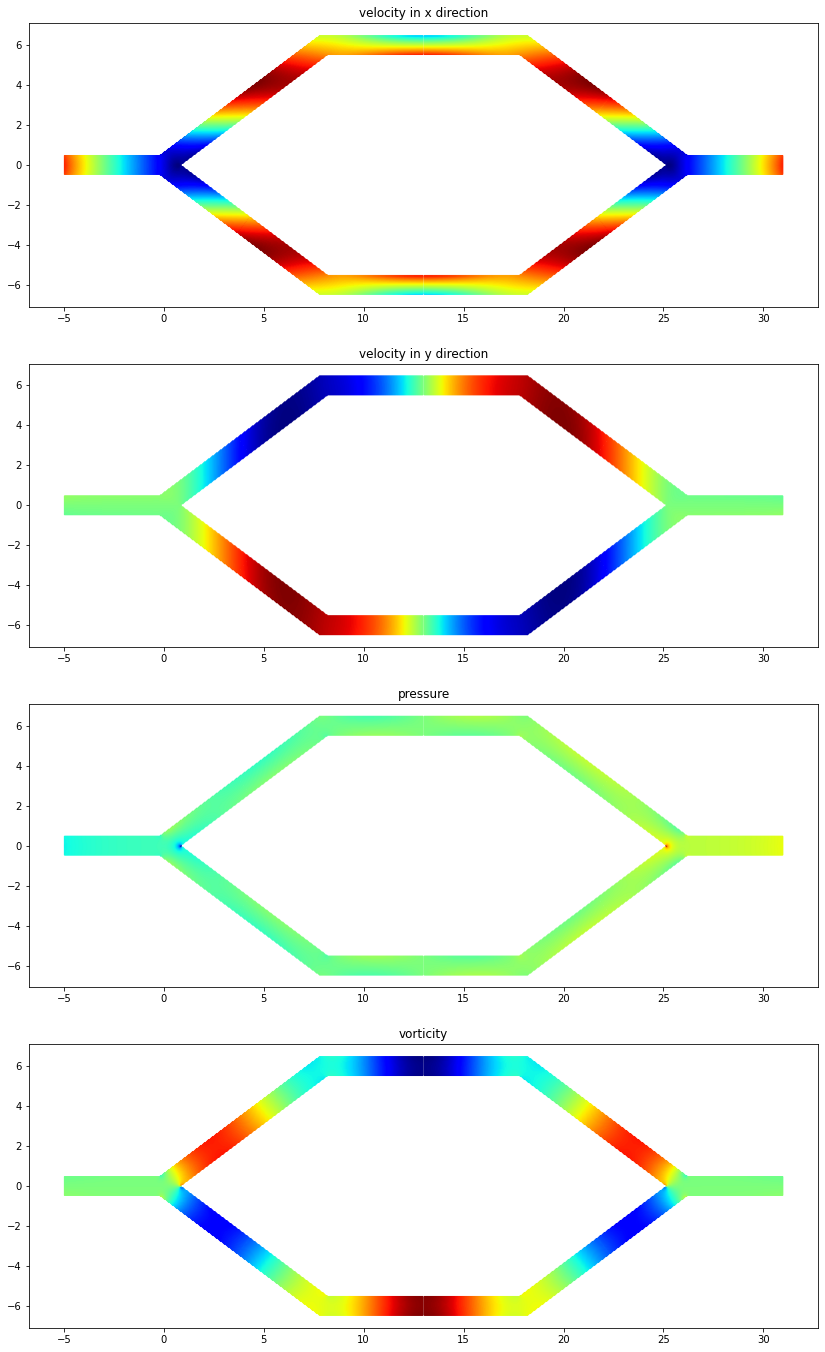

In [35]:
fig,axes = plt.subplots(4,1,figsize=(20,24))

for ax, field, title, in zip(axes, [u_global,v_global,p_global,o_global], ['velocity in x direction','velocity in y direction','pressure','vorticity']):
    ax.set_aspect('equal')
    ax.scatter(xs,ys,c=field,s=1,cmap='jet')
    ax.set_title(title)

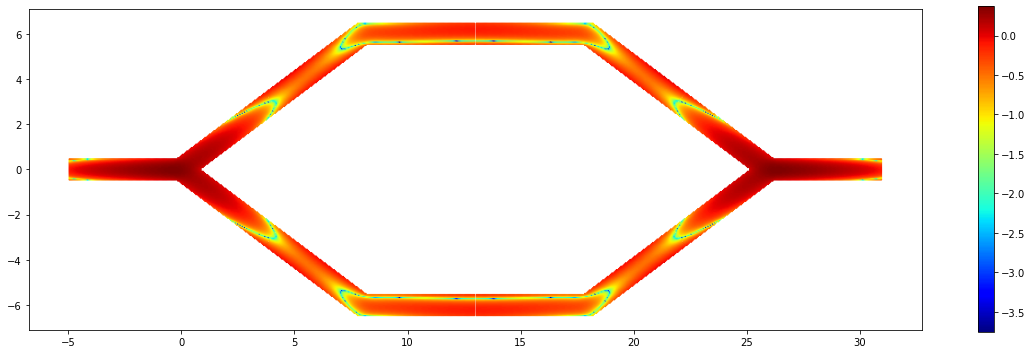

In [10]:
fig,ax = plt.subplots(figsize=(20,6))
ax.set_aspect('equal')
fig.colorbar(ax.scatter(xs,ys,c=np.log10((np.abs(u_global-u_field))),s=1,cmap='jet'))

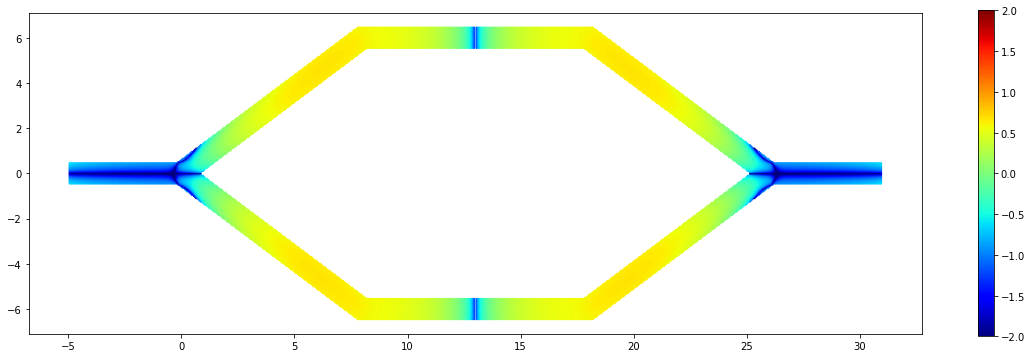

In [12]:
fig,ax = plt.subplots(figsize=(20,6))
ax.set_aspect('equal')
fig.colorbar(ax.scatter(xs,ys,c=np.log10(np.abs(v_field-v_global)),s=1,cmap='jet',vmax=2,vmin=-2))

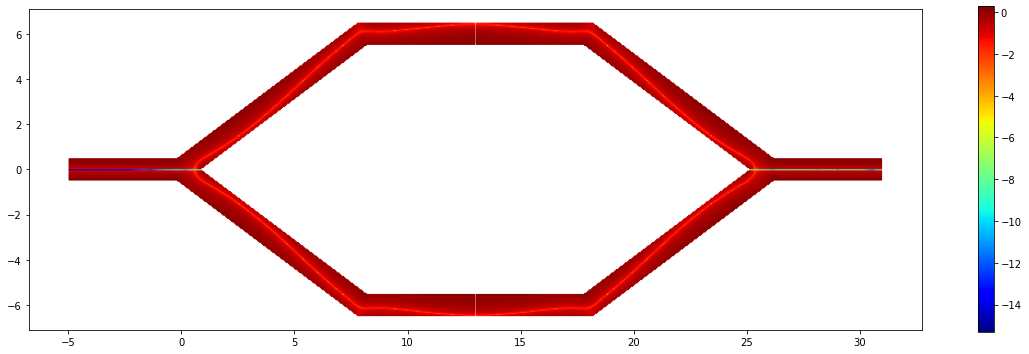

In [18]:
fig,ax = plt.subplots(figsize=(20,6))
ax.set_aspect('equal')
fig.colorbar(ax.scatter(xs,ys,c=np.log10((np.abs(o_field - o_global))),s=1,cmap='jet'))

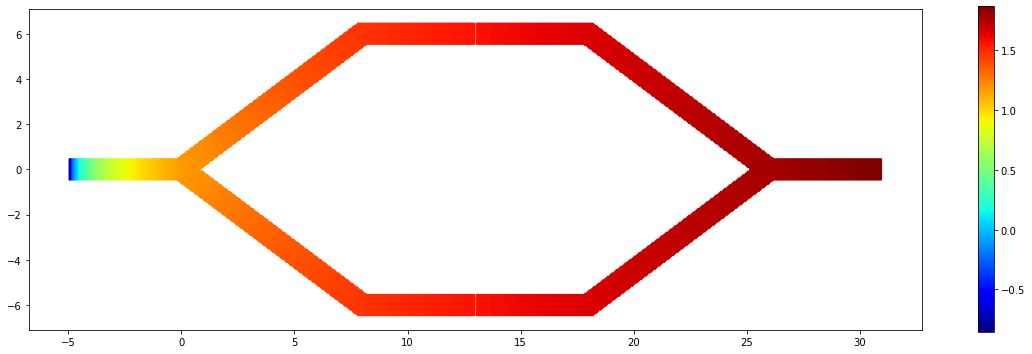

In [19]:
fig,ax = plt.subplots(figsize=(20,6))
ax.set_aspect('equal')
fig.colorbar(ax.scatter(xs,ys,c=np.log10((np.abs(p_field - p_global))),s=1,cmap='jet'))